## Implementing P(a,b)

## Loading mini-Image preprocessed dataset

In [13]:
import zhang_prob

In [14]:
import tensorflow as tf
path = '/home/steffen/Downloads/unzipped_celeb/celeb_data_set_preprocessed_part_0_3/content/celeb_data_set_preprocessed_part_0_3'
new_dataset = tf.data.experimental.load(path,compression= 'GZIP')

a


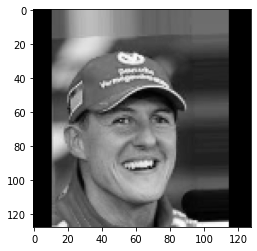

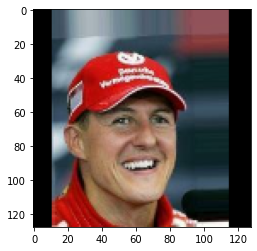

a


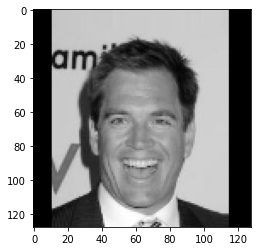

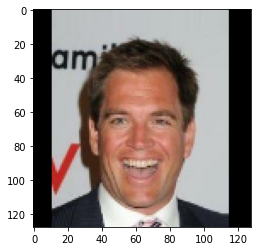

In [15]:
import matplotlib.pyplot as plt
import tensorflow_io as tfio
import numpy as np
for img, target in new_dataset.take(2):
  print('a')
  #add_dim = tf.zeros((32,128,128,2), dtype=tf.dtypes.float32, name=None)
  #img = tf.concat([img,add_dim],3)
  plt.imshow(np.true_divide(np.add(img.numpy()[0][:][:][:].astype("float32"),1),2),cmap='gray')
  plt.show()
  plt.imshow(tfio.experimental.color.lab_to_rgb(target).numpy()[0][:][:][:].astype("float32"))
  plt.show()

In [16]:
# just need the target image
# have a look at Take a look at tf.io.write_file; tf.io.read_file

In [17]:
#create tensor from numpy
# tf.convert_to_tensor


In [18]:
# for the bin calculations
import zhang_prob as zp
count_array = np.zeros(484,dtype=np.int32)
counter = 0
for img, target in new_dataset.take(2):
  #just the target is needed
  for n in range(len(target.numpy())):
    matrix = target.numpy()[n][:][:][:].astype("float32")
    #print(len(matrix[0]))
    #print(matrix.shape[0])
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            # a, b
            array = np.array([matrix[i][j][1],matrix[i][j][2]])
            current_tensor = tf.convert_to_tensor(array)
            count_array[zp.ab_to_bin(current_tensor)] += 1
    print(counter)
    counter += 1
#print(count_array)
print(np.count_nonzero(count_array))
np.save('count_array.npy',count_array)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
128


In [19]:
#new_array = np.array([1,2,3,4,5])
#new_array = np.divide(np.ones(new_array.shape),new_array)
#print(new_array)

In [20]:
from scipy.ndimage import gaussian_filter
count_array = np.load('count_array.npy')
#apply gaussian kernel to matrix
count_array = count_array.reshape((22,22))
count_array = np.divide(count_array,np.sum(count_array))
count_array = gaussian_filter(count_array, sigma=5)
#print(count_array)
prob_tilde = count_array.reshape(484)
#calculate weights
weights = np.divide(np.ones(prob_tilde.shape),np.add(np.multiply(prob_tilde,0.5),(0.5/484)))
#print(weights)
#calculate expected value
sum = 0
for i in range(len(prob_tilde)):
    sum += prob_tilde[i] * weights[i]
factor = 1/sum
weights = np.multiply(weights,factor)
new_sum = 0
for i in range(len(prob_tilde)):
    new_sum += prob_tilde[i] * weights[i]
print(new_sum)
print(weights)
print(np.argmax(weights))






1.0000000000000016
[2.14217833 2.12147844 2.08163368 2.02575354 1.95837136 1.88505588
 1.8117793  1.74421584 1.68717966 1.64435508 1.61813091 1.60990744
 1.62003175 1.64798642 1.69216964 1.7497804  1.81671477 1.88756354
 1.95590908 2.01495728 2.05842326 2.08147002 2.12146254 2.0979933
 2.05300321 1.9903149  1.91534966 1.83455134 1.75458409 1.68153941
 1.62038208 1.57476207 1.5469477  1.5382357  1.54893191 1.57856505
 1.62563417 1.68742951 1.75982804 1.83717356 1.91249018 1.97812494
 2.02677712 2.0526909  2.08145609 2.05282123 1.9983603  1.92340734
 1.83517085 1.74172864 1.65089811 1.5693265  1.50202736 1.45239885
 1.42236431 1.41296258 1.42440636 1.45633316 1.50750335 1.57551254
 1.65640092 1.74428781 1.83136539 1.90848247 1.96640324 1.9975212
 2.02505044 1.98953815 1.92273786 1.83235801 1.72820471 1.6204652
 1.51817073 1.42827629 1.35546611 1.30252457 1.27076283 1.26080491
 1.27272389 1.30632297 1.3607918  1.43430986 1.52343718 1.62240562
 1.72271894 1.8134939  1.88290381 1.92064007 1

In [21]:
print(np.argmin(weights))
zp.bin_to_ab(253)

253


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([5., 5.], dtype=float32)>

In [22]:
#save tensor
#example_array = np.array([1,2,3,4])
#example_tensor = tf.convert_to_tensor(example_array)
np.save('weights_tensor.npy', weights)
print_tensor = tf.convert_to_tensor(np.load('weights_tensor.npy'))
print(print_tensor)


tf.Tensor(
[2.14217833 2.12147844 2.08163368 2.02575354 1.95837136 1.88505588
 1.8117793  1.74421584 1.68717966 1.64435508 1.61813091 1.60990744
 1.62003175 1.64798642 1.69216964 1.7497804  1.81671477 1.88756354
 1.95590908 2.01495728 2.05842326 2.08147002 2.12146254 2.0979933
 2.05300321 1.9903149  1.91534966 1.83455134 1.75458409 1.68153941
 1.62038208 1.57476207 1.5469477  1.5382357  1.54893191 1.57856505
 1.62563417 1.68742951 1.75982804 1.83717356 1.91249018 1.97812494
 2.02677712 2.0526909  2.08145609 2.05282123 1.9983603  1.92340734
 1.83517085 1.74172864 1.65089811 1.5693265  1.50202736 1.45239885
 1.42236431 1.41296258 1.42440636 1.45633316 1.50750335 1.57551254
 1.65640092 1.74428781 1.83136539 1.90848247 1.96640324 1.9975212
 2.02505044 1.98953815 1.92273786 1.83235801 1.72820471 1.6204652
 1.51817073 1.42827629 1.35546611 1.30252457 1.27076283 1.26080491
 1.27272389 1.30632297 1.3607918  1.43430986 1.52343718 1.62240562
 1.72271894 1.8134939  1.88290381 1.92064007 1.9565401